Saving final_dataset.csv to final_dataset.csv
Yearly Average Pollutant Levels:

   Year       PM2.5        PM10        NO2        SO2      Ozone        CO  \
0  2021  120.319671  215.048904  49.856274   7.911397  34.501671  1.228795   
1  2022   97.456630  215.290877  23.997781  16.034685  35.308164  1.028384   
2  2023   70.420192  213.373479  37.887644  19.483425  36.055781  0.962082   
3  2024   74.945027  229.133880  36.998497  36.944044  39.481257  0.884454   

          AQI  
0  215.813699  
1  208.536986  
2  189.060274  
3  195.450820  


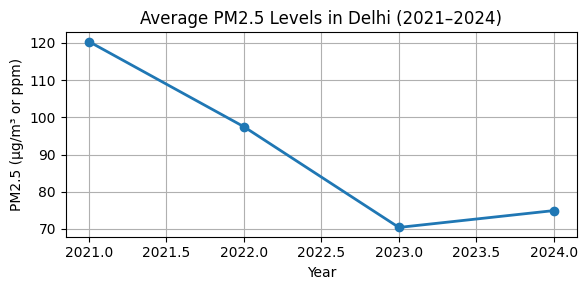

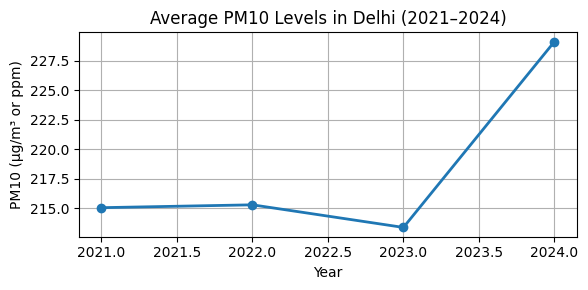

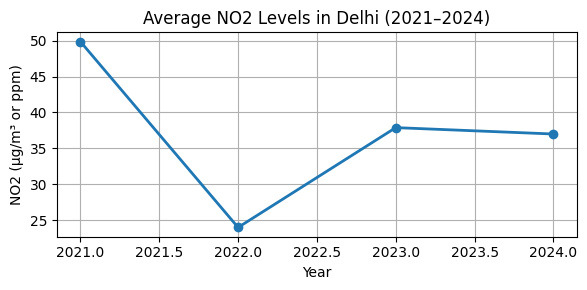

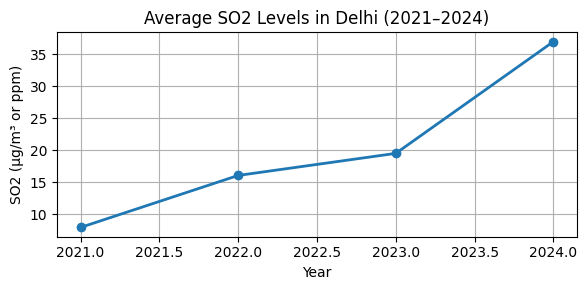

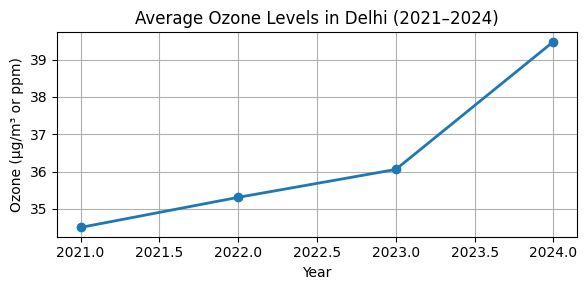

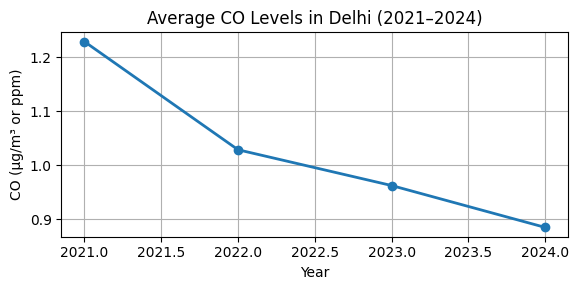

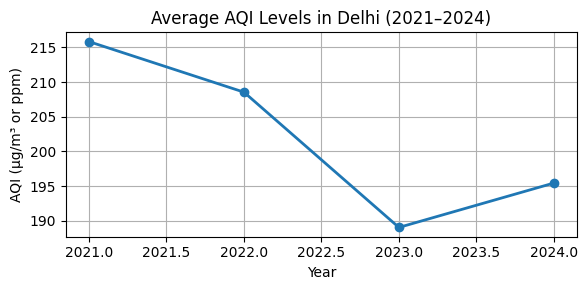

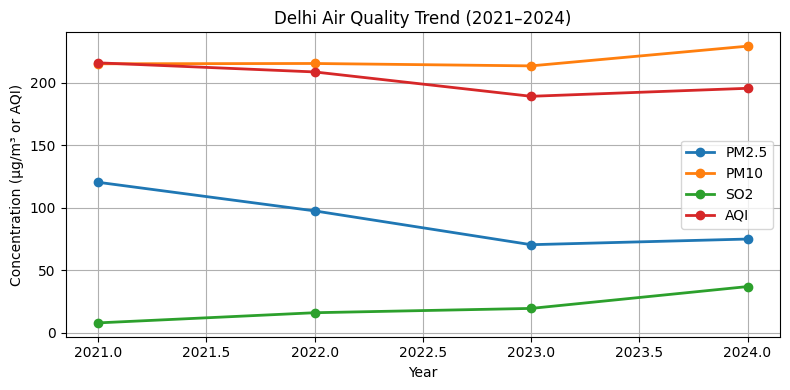

In [ ]:
# --- Delhi Air Quality Analysis (2021–2024) ---

import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("final_dataset.csv")

df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Date']].rename(columns={'Date':'day'}), errors='coerce')


pollutants = ['PM2.5','PM10','NO2','SO2','Ozone','CO','AQI']

annual_trends = df.groupby('Year')[pollutants].mean().reset_index()
print("Yearly Average Pollutant Levels:\n")
print(annual_trends)

for col in pollutants:
    plt.figure(figsize=(6,3))
    plt.plot(annual_trends['Year'], annual_trends[col], marker='o', linewidth=2)
    plt.title(f"Average {col} Levels in Delhi (2021–2024)")
    plt.xlabel("Year")
    plt.ylabel(f"{col} (µg/m³ or ppm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8,4))
for col in ['PM2.5','PM10','SO2','AQI']:
    plt.plot(annual_trends['Year'], annual_trends[col], marker='o', linewidth=2, label=col)

plt.title("Delhi Air Quality Trend (2021–2024)")
plt.xlabel("Year")
plt.ylabel("Concentration (µg/m³ or AQI)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Average Pollutant Levels by Season
                   PM2.5        PM10        NO2        SO2      Ozone  \
Season                                                                  
Winter        133.565429  292.615512  45.209695  15.439418  27.521524   
Summer         91.909783  228.666060  29.077690  24.261304  46.296386   
Monsoon        49.332310  123.672962  29.972636  19.238043  41.175163   
Post-Monsoon   89.086236  229.459835  44.714148  21.406319  30.127170   

                    CO         AQI  
Season                              
Winter        1.334044  282.149584  
Summer        0.958940  207.236413  
Monsoon       0.658505  114.173913  
Post-Monsoon  1.159148  206.854396  


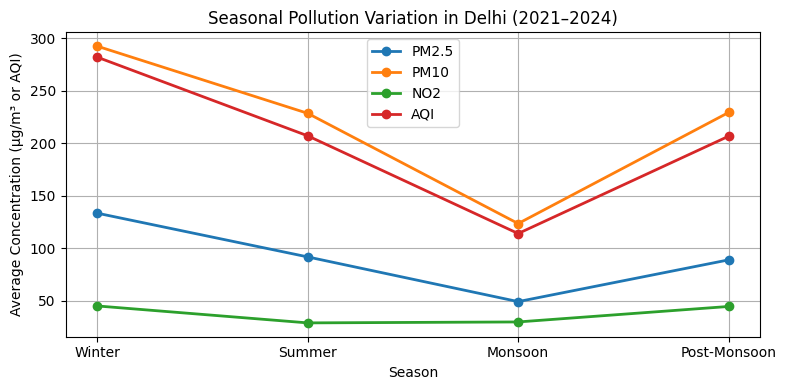

In [ ]:
# --- Seasonal Pollution Trend Analysis ---

import pandas as pd
import matplotlib.pyplot as plt

if 'Datetime' not in df.columns:
    df['Datetime'] = pd.to_datetime(df[['Year','Month','Date']].rename(columns={'Date':'day'}), errors='coerce')


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season'] = df['Month'].apply(get_season)



pollutants = ['PM2.5','PM10','NO2','SO2','Ozone','CO','AQI']
seasonal_trends = df.groupby('Season')[pollutants].mean().reindex(['Winter','Summer','Monsoon','Post-Monsoon'])
print("Average Pollutant Levels by Season")
print(seasonal_trends)



plt.figure(figsize=(8,4))
for col in ['PM2.5','PM10','NO2','AQI']:
    plt.plot(seasonal_trends.index, seasonal_trends[col], marker='o', linewidth=2, label=col)

plt.title("Seasonal Pollution Variation in Delhi (2021–2024)")
plt.xlabel("Season")
plt.ylabel("Average Concentration (µg/m³ or AQI)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



PM10     0.899421
PM2.5    0.801960
CO       0.696809
NO2      0.319261
SO2      0.036288
Ozone   -0.164281
Name: AQI, dtype: float64


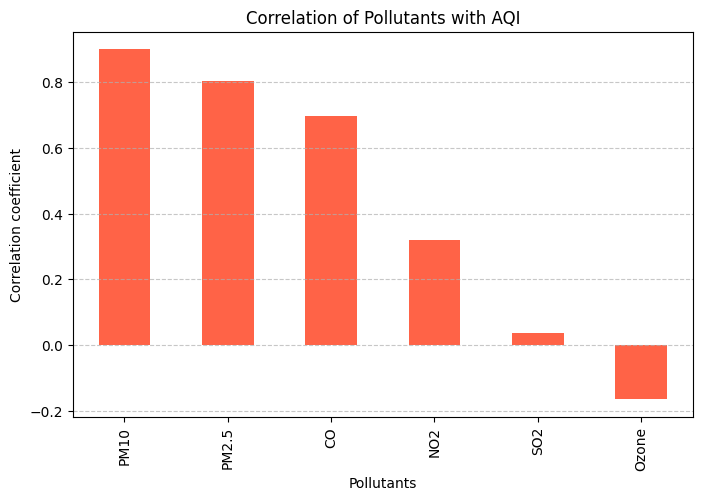

In [ ]:
pollutants = ['PM2.5','PM10','NO2','SO2','CO','Ozone']
corr = df[pollutants + ['AQI']].corr()

corr_with_aqi = corr['AQI'].drop('AQI').sort_values(ascending=False)
print(corr_with_aqi)

plt.figure(figsize=(8,5))
corr_with_aqi.plot(kind='bar', color='tomato')
plt.title('Correlation of Pollutants with AQI')
plt.ylabel('Correlation coefficient')
plt.xlabel('Pollutants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Correlation between pollutants:

          PM2.5      PM10       NO2       SO2        CO     Ozone
PM2.5  1.000000  0.721745  0.245283 -0.082946  0.690090 -0.159882
PM10   0.721745  1.000000  0.270478  0.131045  0.647241 -0.152054
NO2    0.245283  0.270478  1.000000  0.057626  0.329214 -0.155068
SO2   -0.082946  0.131045  0.057626  1.000000 -0.068631  0.188534
CO     0.690090  0.647241  0.329214 -0.068631  1.000000 -0.199935
Ozone -0.159882 -0.152054 -0.155068  0.188534 -0.199935  1.000000


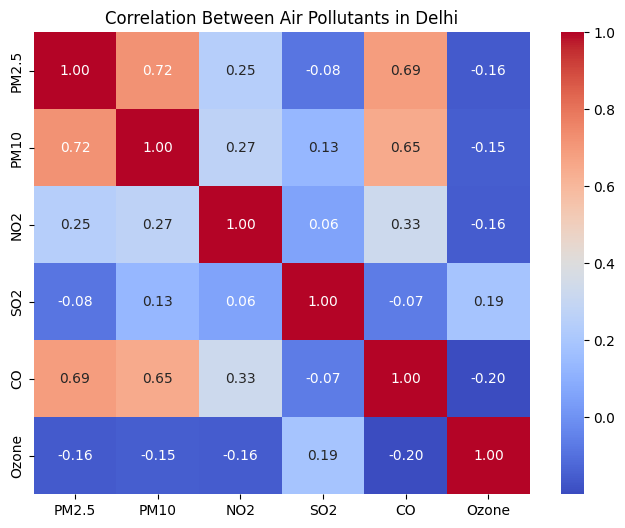

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('final_dataset.csv')


pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']


corr_matrix = df[pollutants].corr()

print("Correlation between pollutants:\n")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Air Pollutants in Delhi")
plt.show()


Pollutant exceedance over WHO safety limits:

  Pollutant  Exceed_Days  Total_Days  Percent_Exceed
0     PM2.5         1432        1461           98.02
1      PM10         1413        1461           96.71
2       NO2          905        1461           61.94
3       SO2          163        1461           11.16
4        CO            2        1461            0.14
5     Ozone           11        1461            0.75


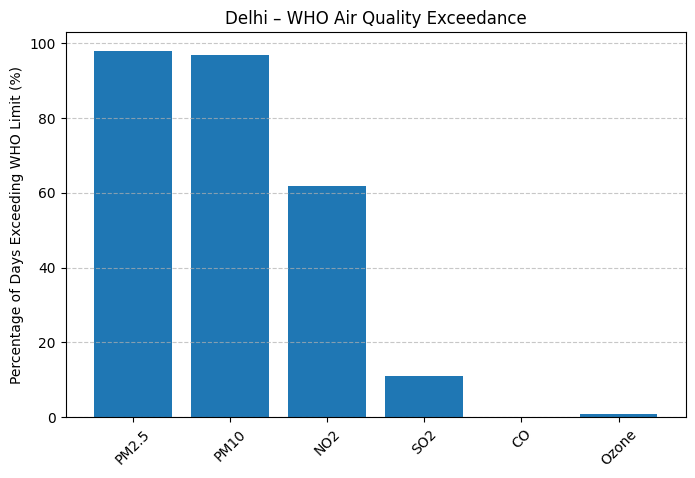

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_dataset.csv')

WHO_LIMITS = {
    'PM2.5': 15,
    'PM10': 45,
    'NO2': 25,
    'SO2': 40,
    'CO': 4,
    'Ozone': 100
}


exceed_data = []
for pollutant, limit in WHO_LIMITS.items():
    if pollutant in df.columns:
        exceed_count = (df[pollutant] > limit).sum()
        total_count = df[pollutant].count()
        percent_exceed = (exceed_count / total_count) * 100
        exceed_data.append({
            'Pollutant': pollutant,
            'Exceed_Days': exceed_count,
            'Total_Days': total_count,
            'Percent_Exceed': round(percent_exceed, 2)
        })


exceed_df = pd.DataFrame(exceed_data)


print("Pollutant exceedance over WHO safety limits:\n")
print(exceed_df)


plt.figure(figsize=(8,5))
plt.bar(exceed_df['Pollutant'], exceed_df['Percent_Exceed'])
plt.ylabel('Percentage of Days Exceeding WHO Limit (%)')
plt.title('Delhi – WHO Air Quality Exceedance')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Pollution Level Comparison (Holidays vs Working Days):


,Holiday_Avg,Working_Day_Avg,Difference(Holiday-Working)
PM2.5,89.46,91.08,-1.62
PM10,213.73,219.27,-5.54
NO2,36.78,37.28,-0.50
SO2,20.40,20.03,0.37
CO,1.02,1.03,-0.01
Ozone,36.63,36.27,0.36
AQI,202.31,202.19,0.12


<Figure size 1000x600 with 0 Axes>

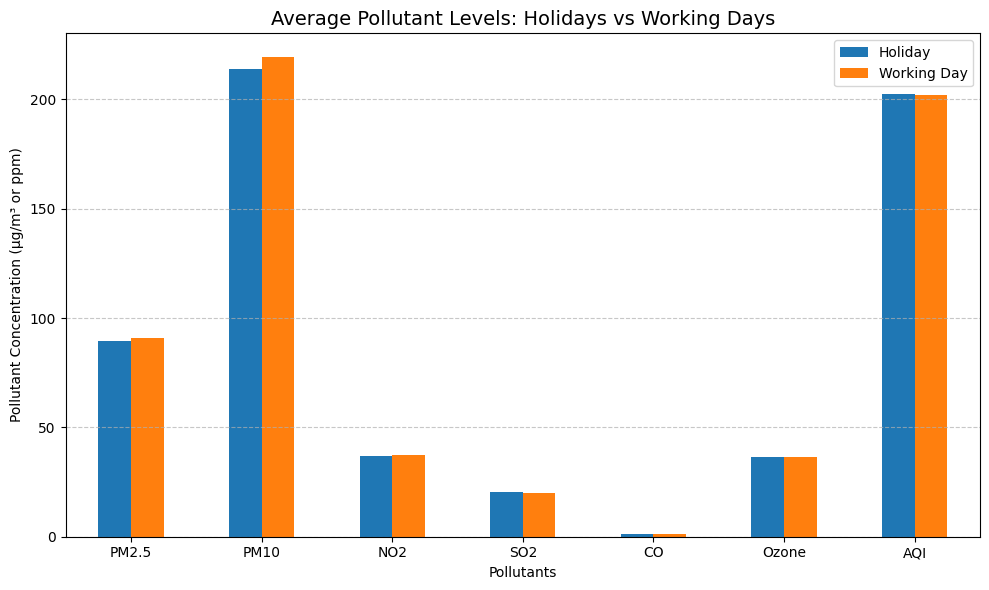

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("final_dataset.csv")
holidays = df[df["Holidays_Count"] == 1]
working_days = df[df["Holidays_Count"] == 0]


pollutant_cols = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone", "AQI"]

mean_holiday = holidays[pollutant_cols].mean()
mean_working = working_days[pollutant_cols].mean()


comparison = pd.DataFrame({
    "Holiday_Avg": mean_holiday,
    "Working_Day_Avg": mean_working,
    "Difference(Holiday-Working)": mean_holiday - mean_working
}).round(2)


print("Pollution Level Comparison (Holidays vs Working Days):")
display(comparison)



plt.figure(figsize=(10,6))
comparison[["Holiday_Avg", "Working_Day_Avg"]].plot(kind="bar", figsize=(10,6))
plt.title("Average Pollutant Levels: Holidays vs Working Days", fontsize=14)
plt.ylabel("Pollutant Concentration (µg/m³ or ppm)")
plt.xlabel("Pollutants")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(["Holiday", "Working Day"])
plt.tight_layout()
plt.show()
